In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Test

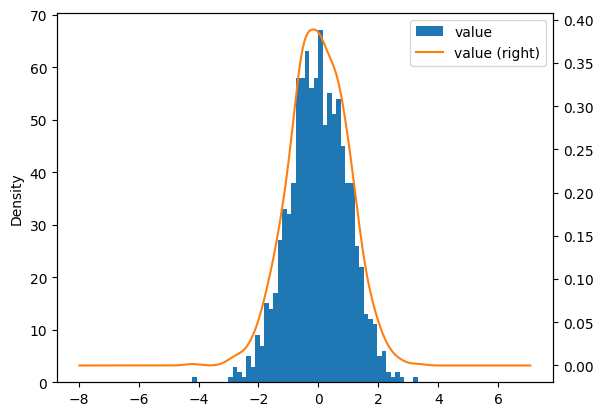

In [39]:
data = np.random.randn(1000,1)
df = pd.DataFrame(data,columns=['value'])
ax = df.plot.hist(bins=50)
df.plot.kde(ax=ax,secondary_y=True)
plt.show()

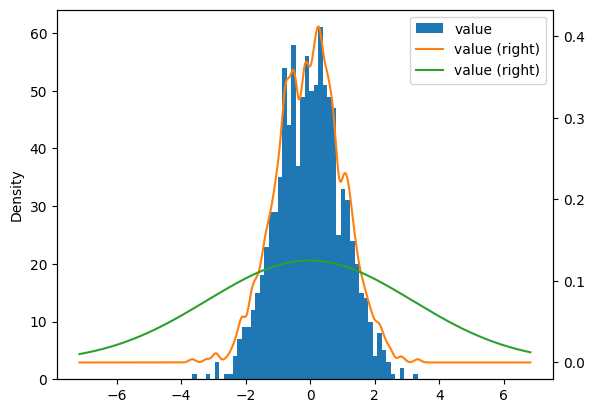

In [40]:
data = np.random.randn(1000,1)
df = pd.DataFrame(data,columns=['value'])
ax = df.plot.hist(bins=50)
df.plot.kde(ax=ax,secondary_y=True,bw_method=0.1)
df.plot.kde(ax=ax,secondary_y=True,bw_method=3)
plt.show()

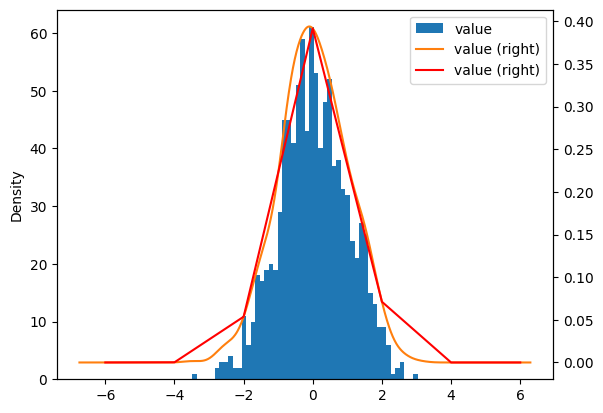

In [41]:
data = np.random.randn(1000,1)
df = pd.DataFrame(data,columns=['value'])
ax = df.plot.hist(bins=50)
df.plot.kde(ax=ax,secondary_y=True)
df.plot.kde(ax=ax,secondary_y=True,ind=[-6,-4,-2,0,2,4,6],color='red')
plt.show()

## Real Test

In [42]:
import os
train_path: str = os.path.join(os.getcwd(), "contents", "train.csv")
test_path: str = os.path.join(os.getcwd(), "contents", "test.csv")
submission_path: str = os.path.join(os.getcwd(), "contents", "sample_submission.csv")

In [43]:
train_df = pd.read_csv(train_path)

print(train_df.shape)
train_df.head(5)

(11504798, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [44]:
train_tmp = train_df.copy()
train_tmp['Gender'] = train_tmp['Gender'].replace(['Female', 'Male'], [0, 1])
train_tmp['Vehicle_Age'] = train_tmp['Vehicle_Age'].replace(['1-2 Year', '< 1 Year', '> 2 Years'], [0, 1, 2])
train_tmp['Vehicle_Damage'] = train_tmp['Vehicle_Damage'].replace(['No', 'Yes'], [0, 1])
train_tmp.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,0,1,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,0,1,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,0,0,31951.0,152.0,294,0


In [45]:
train_tmp[['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response', 'Policy_Sales_Channel']] = train_tmp[['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response', 'Policy_Sales_Channel']].astype('uint8')
train_tmp[['Vintage', 'Annual_Premium']] = train_tmp[['Vintage', 'Annual_Premium']].astype('uint16')
train_tmp['Region_Code'] = train_tmp['Region_Code'] * 10
train_tmp['Region_Code'] = train_tmp['Region_Code'].astype('uint8')

train_tmp.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,94,0,0,1,65101,124,187,0
1,1,1,43,1,24,0,2,1,58911,26,288,1
2,2,0,25,1,140,1,1,0,38043,152,254,0
3,3,0,35,1,10,0,0,1,2630,156,76,0
4,4,0,36,1,150,1,0,0,31951,152,294,0


Response
0    10089739
1     1415059
Name: count, dtype: int64

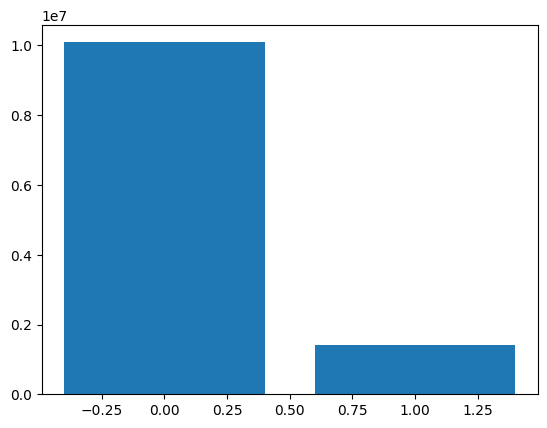

In [46]:
plt.bar([0, 1], train_tmp['Response'].value_counts())
train_tmp['Response'].value_counts()

## Distribute 0 and 1

In [47]:
response_0 = train_tmp[train_tmp['Response'] == 0]
response_0.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,94,0,0,1,65101,124,187,0
2,2,0,25,1,140,1,1,0,38043,152,254,0
3,3,0,35,1,10,0,0,1,2630,156,76,0
4,4,0,36,1,150,1,0,0,31951,152,294,0
5,5,0,31,1,214,1,1,0,28150,152,197,0


In [54]:
response_1 = train_tmp[train_tmp['Response'] == 1]
response_1.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,1,1,43,1,24,0,2,1,58911,26,288,1
7,7,0,47,1,80,0,0,1,40659,26,262,1
28,28,1,40,1,94,0,0,1,2630,157,204,1
36,36,0,50,1,204,0,0,1,29248,124,273,1
44,44,1,40,1,80,0,0,1,36217,124,286,1


/tmp/ipykernel_13325/303508382.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_normalized[col], shade=True, label=col)
/tmp/ipykernel_13325/303508382.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_normalized[col], shade=True, label=col)
/tmp/ipykernel_13325/303508382.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_normalized[col], shade=True, label=col)
/tmp/ipykernel_13325/303508382.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_normalized[col], shade=True,

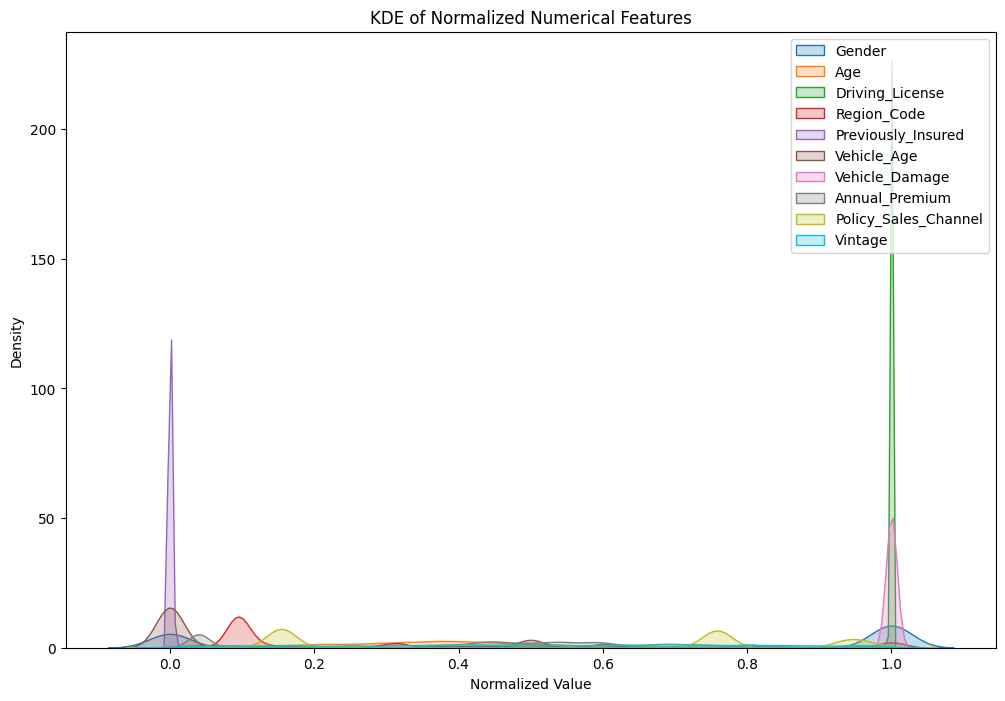

: 

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns
numerical_cols = ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Normalize the numerical columns
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(response_1[numerical_cols]), columns=numerical_cols)

# Plot KDEs for each numerical column on the same plot
plt.figure(figsize=(12, 8))

for col in numerical_cols:
    sns.kdeplot(data_normalized[col], shade=True, label=col)

plt.title('KDE of Normalized Numerical Features')
plt.xlabel('Normalized Value')
plt.ylabel('Density')
plt.legend()
plt.show()